# Get the Data

In [825]:
from pathlib import Path
import pandas as pd
import tarfile 
import urllib.request

def load_housing_data():
    data_file_path=Path("dataSets/housing.tgz")
    if not data_file_path.is_file():
        Path("dataSets").mkdir(parents=True, exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,data_file_path)
    with tarfile.open(data_file_path) as housing_data:
        housing_data.extractall(path="dataSets")
    return pd.read_csv(Path("dataSets/housing/housing.csv"))

housing=load_housing_data()

/var/folders/bv/4v76sz4s6hs6w1z89wsx1fd80000gn/T/ipykernel_970/3637518122.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_data.extractall(path="dataSets")


In [826]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [827]:
housing.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [828]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [829]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [830]:
housing['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

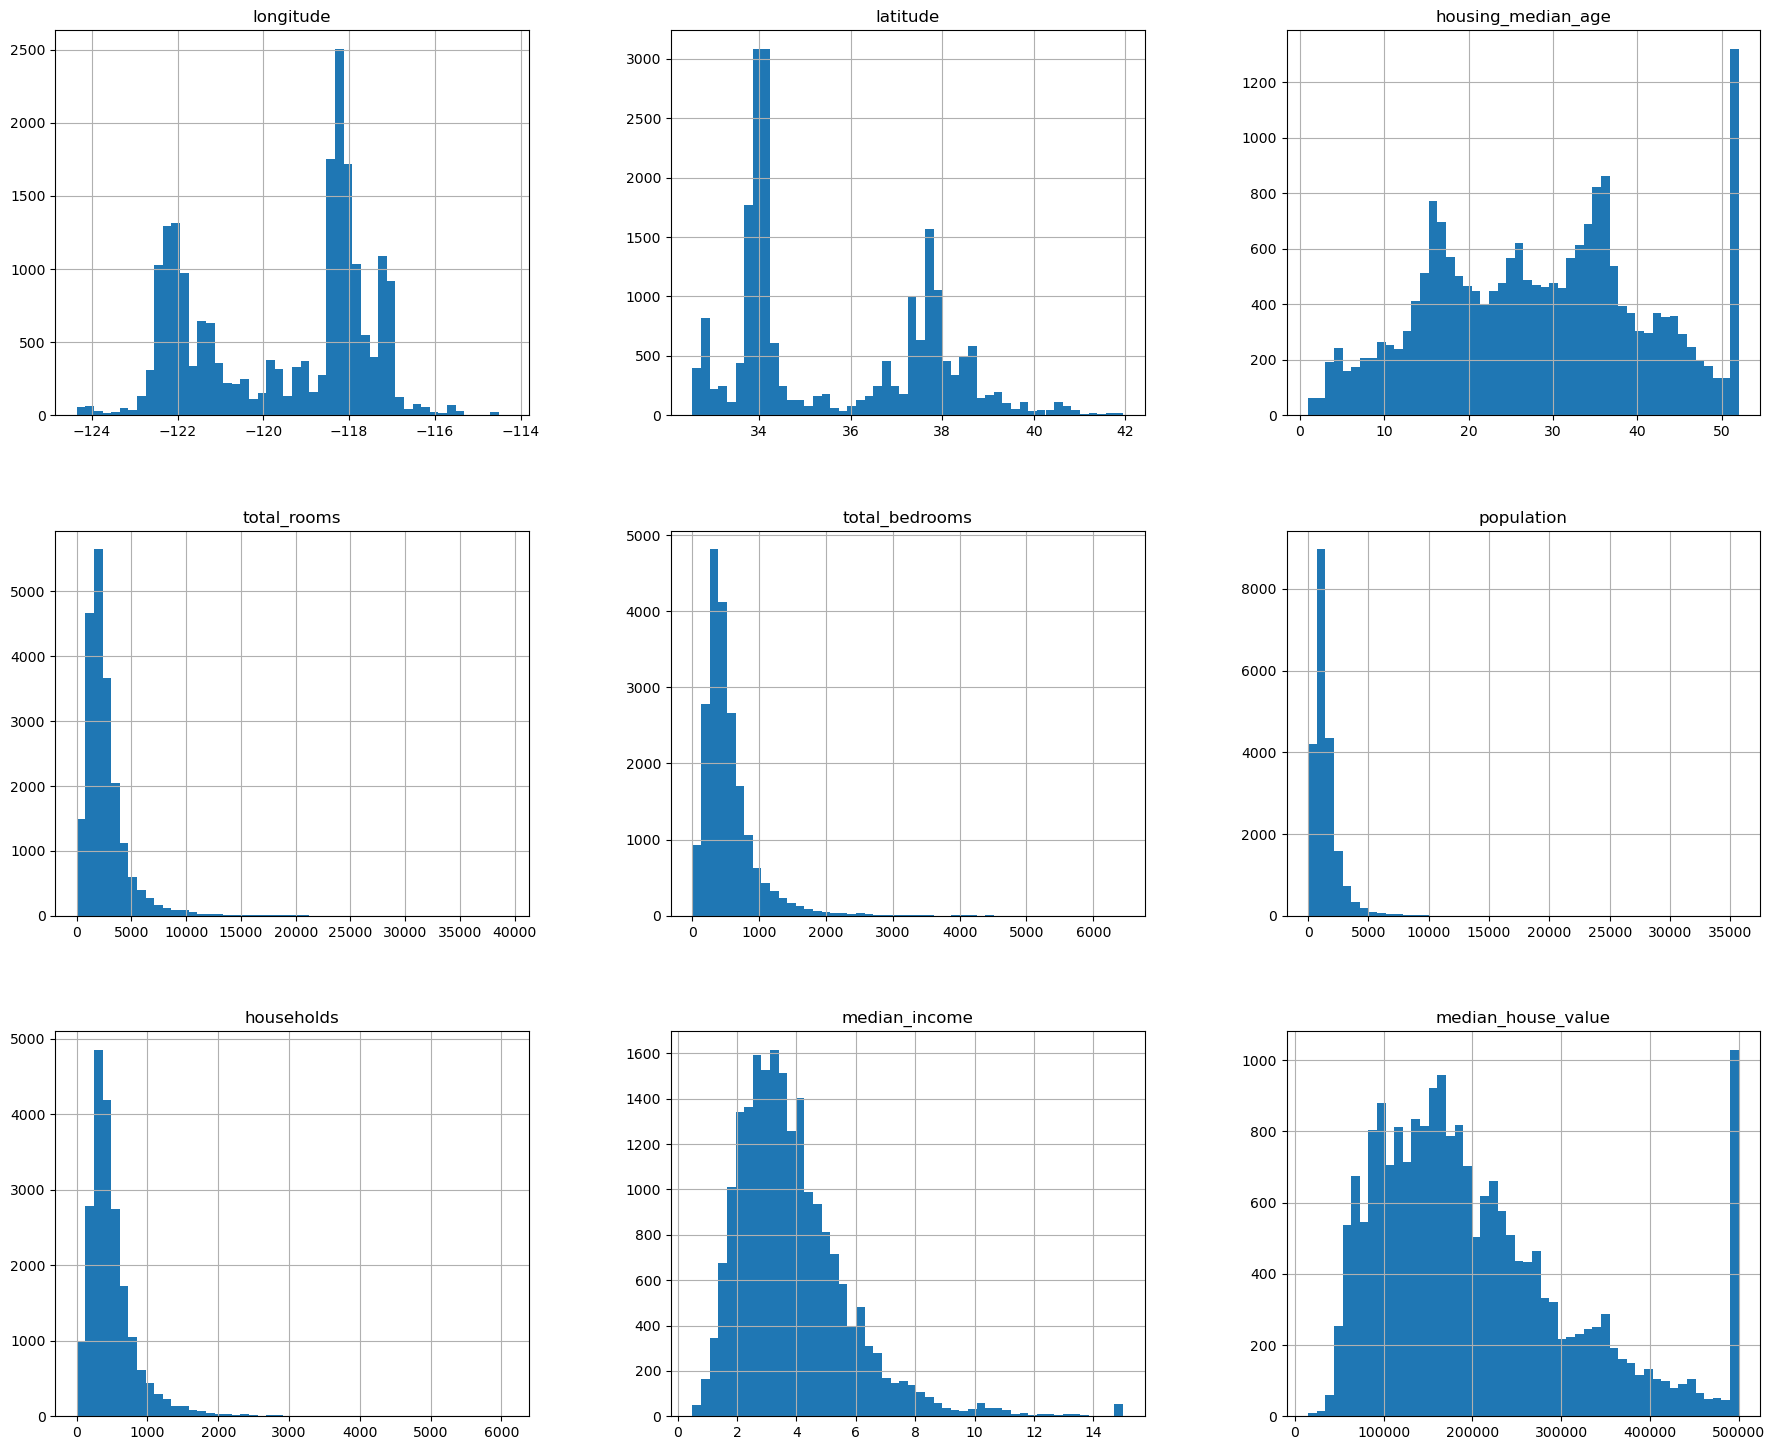

In [831]:
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(22,18))
plt.show()

# Test sets and train sets 

In [833]:
import numpy as np

def shuffle_and_split_data(data,test_ratio):
    shuffle_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffle_indices[:test_set_size]
    train_indices=shuffle_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    
    

In [834]:
train_set,test_set=shuffle_and_split_data(housing,0.2)
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

np.random.seed(43)









Training set size: 16512
Test set size: 4128


In [835]:
from zlib import crc32

def is_id_in_test_set(identifier,test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32
    
def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data[id_column]#Extract the columns with unique ids
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]
    

In [836]:
housing_with_id=housing.reset_index()

train_set1,test_set1=split_data_with_id_hash(housing_with_id,0.2,"index")
train_set2,test_set2=split_data_with_id_hash(housing_with_id,0.2,"index")
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))
print(train_set1.equals(train_set2))
print(test_set1.equals(test_set2))


Train set size: 16512
Test set size: 4128
True
True


In [837]:
housing_with_id["id"]=housing["longitude"]*1000 +housing["latitude"]
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"id")
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))



Train set size: 16322
Test set size: 4318


In [838]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))


Train set size: 16512
Test set size: 4128


# Stratified Sampling

In [840]:
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3,4.5,6,np.inf],
                            labels=[1,2,3,4,5])


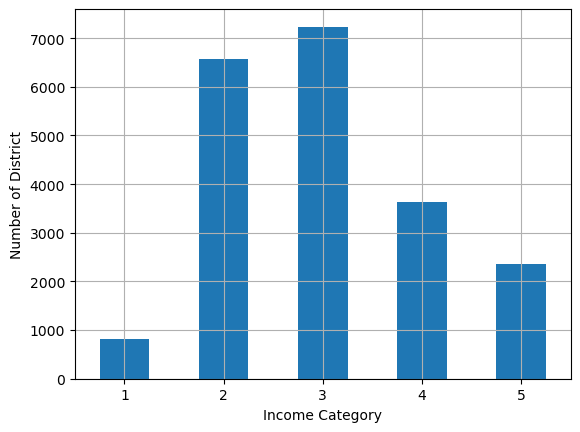

In [841]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)

plt.xlabel("Income Category")
plt.ylabel("Number of District")
plt.show()

###  Option 1: Use First Split from StratifiedShuffleSplit

In [843]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

    


In [844]:
strat_train_set,strat_test_set=strat_splits[0]


### Option 2: Simpler Way Using train_test_split()

In [846]:
strat_train_set,strat_test_set=train_test_split(
    housing,test_size=0.2,stratify=housing["income_cat"],random_state=42
)

In [847]:
strat_test_set["income_cat"].value_counts()

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [848]:
len(strat_test_set)

4128

In [849]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [850]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)
train_set,test_set=train_test_split(
    housing,test_size=0.2,random_state=42)
compare_proportions=pd.DataFrame({
    "Overall %" : income_cat_proportions(housing),
    "Stratified %" : income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_proportions.index.name="Income Category"
compare_proportions["Strat. Error %"]=(compare_proportions["Stratified %"]/compare_proportions["Overall %"]-1)
compare_proportions["Rand. Error %"]=(compare_proportions["Random %"]/compare_proportions["Overall %"]-1)
(compare_proportions*100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [851]:
strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3


In [852]:
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)  #axis=1 because we have to drop column

In [853]:
strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


# Explore and visualize the Data (Train Set Data) To Gain Insights

In [855]:
housing=strat_train_set.copy()

In [856]:
housing.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


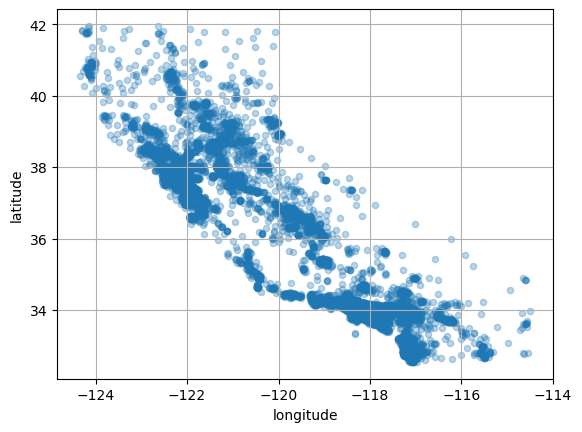

In [857]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.3)
plt.show()

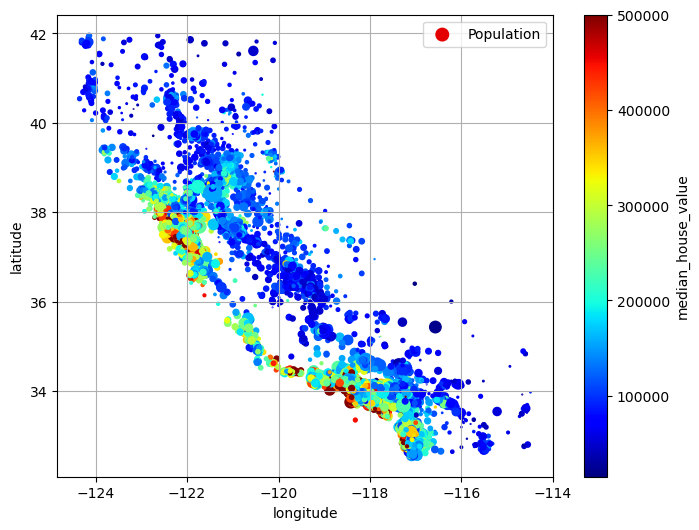

In [858]:
housing.plot(kind="scatter",x="longitude" ,y="latitude",grid=True,
            s=housing["population"]/100,label="Population",
            c="median_house_value",cmap="jet",colorbar=True,
             legend=True,figsize=(8,6),sharex=False
            )

plt.show()

# Look for Correlations


In [860]:
corr_matrix=housing.corr(numeric_only=True)

In [861]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

***Using Pandas scatter_matrix()***

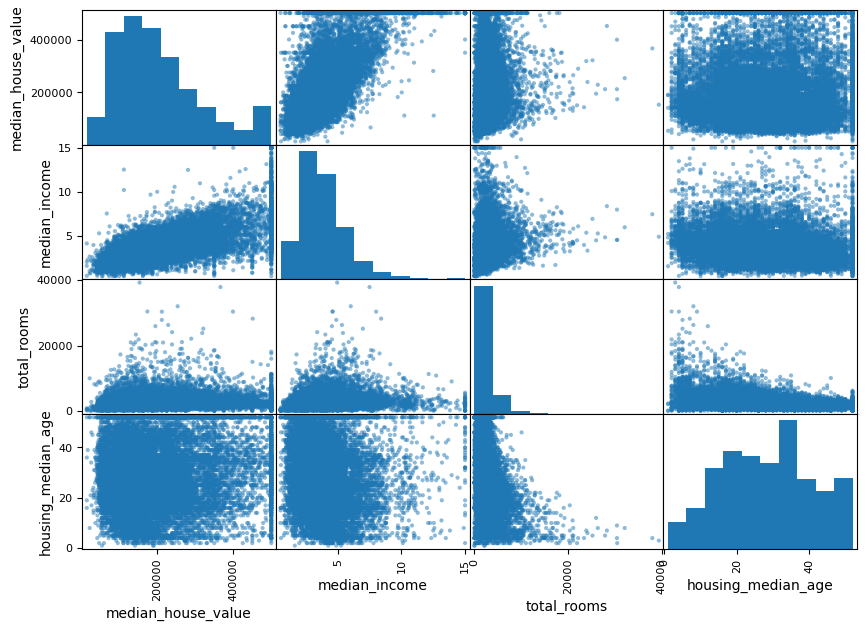

In [863]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

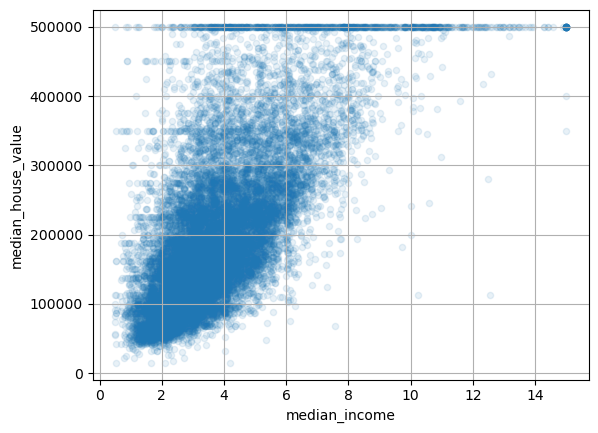

In [864]:
housing.plot(kind="scatter",y="median_house_value",x="median_income",alpha=0.1,grid=True)


In [865]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedroom_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]


In [866]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

# Prepare Data For Machine Learning Algorithm


In [868]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399


In [869]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_label=strat_train_set["median_house_value"].copy()


In [870]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [871]:
housing_label


13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

## Clean The Data

In [873]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")


In [874]:
housing_num=housing.select_dtypes(include=[np.number])


In [875]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [876]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [877]:
X=imputer.transform(housing_num)

In [878]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [879]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [880]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes


In [882]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [883]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [884]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [885]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder=OneHotEncoder()
housing_cat_one_hot=one_hot_encoder.fit_transform(housing_cat)

In [886]:
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [887]:
housing_cat_one_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

# Feature Scaling and Transformation

In [889]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scale=min_max_scaler.fit_transform(housing_num)

In [890]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
housing_num_std_scaler=std_scaler.fit_transform(housing_num)

In [891]:
#	RBF similarity ek tareeka hai machine ko bolne ka:
#“Bhai! Jab value is special point ke aas paas ho — toh tu zyada dhyan de!”

from sklearn.metrics.pairwise import rbf_kernel

age_simi_35=rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

In [892]:
from sklearn.linear_model import LinearRegression

target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_label.to_frame())

model=LinearRegression()

model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]
scaled_predictions=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_predictions)

predictions


array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [893]:
from sklearn.compose import TransformedTargetRegressor

model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())

model.fit(housing[["median_income"]],housing_label)
predictions=model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom Transformers

In [895]:
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_popu=log_transformer.transform(housing[["population"]])

In [896]:
rbf_transformer=FunctionTransformer(rbf_kernel,
                                   kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[["housing_median_age"]])


In [897]:
sf_coords=37.7749, -122.41
sf_transformer=FunctionTransformer(rbf_kernel,
                                  kw_args=dict(Y=[sf_coords],gamma=0.1))
sf_simil=sf_transformer.transform(housing[["latitude","longitude"]])

In [898]:
ratio_transformer=FunctionTransformer(lambda X:X[:,[0]]/X[:,[1]])
ratio_transformer.transform(np.array([[1,2],[3,4]]))

#[[1/2], [3/4]] → [[0.5], [0.75]]

array([[0.5 ],
       [0.75]])

# Transformation Pipelines

In [900]:
import sklearn
sklearn.set_config(display="diagram")

In [901]:
from sklearn.pipeline import Pipeline


num_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler())
    
])
num_pipeline


Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [902]:
#Shortcut to create pipeline without using name
from sklearn.pipeline import make_pipeline

num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

print(num_pipeline)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])


In [903]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [904]:
df_housing_num_prepared=pd.DataFrame(
    housing_num_prepared,columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index
)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [905]:
from sklearn.compose import ColumnTransformer
num_attribs=["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs=["ocean_proximity"]

cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
])
preprocessing



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [906]:
from sklearn.compose import make_column_selector,make_column_transformer

preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object))
)
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x354ee3500>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x352cfec30>)])

## Full Feature Engineering Pipeline Execution

In [908]:
housing_prepared=preprocessing.fit_transform(housing)


In [909]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [910]:
from sklearn.cluster import KMeans

def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio,feature_names_out=ratio_name),
        StandardScaler()
    )
log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler()
)
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)


In [911]:
housing_prepared = preprocessing.fit_transform(housing)
preprocessing


ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x352d596c0>,
                                                                      func=<function column_ratio at 0...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])

# Select and Train a Model


## Train and Evaluate on the Training Set

### On Linear Regression

In [915]:
from sklearn.linear_model import LinearRegression

lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_label)
lin_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x352...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])),
                ('linearregression', LinearRegression())])

In [916]:
housing_predictions=lin_reg.predict(housing)
housing_predictions[:5].round(-2)


array([246400., 373100., 137700.,  92200., 330500.])

In [917]:
housing_label.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

**Performance measure  by using  Root Mean Square Error (RMSE)**


In [919]:
from sklearn.metrics import root_mean_squared_error
lin_rmse=root_mean_squared_error(housing_label,housing_predictions)
lin_rmse

68983.39124059714

### On DecisionTreeRegressor

In [921]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_label)
tree_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x352...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [922]:
housing_prediction=tree_reg.predict(housing)
housing_prediction[:5].round(-2)   # 🤯 Output is without any variation i.e exactly same, but...

array([458300., 483800., 101700.,  96100., 361800.])

In [923]:
tree_rmse=root_mean_squared_error(housing_label,housing_prediction)
tree_rmse                 # The Model has badly overfit the data

0.0

### Better Evaluation Using Cross-Validation


In [925]:
from sklearn.model_selection import cross_val_score

tree_rmse_score= -cross_val_score(tree_reg,housing,housing_label,
                                 scoring="neg_root_mean_squared_error",cv=10)

In [926]:
pd.Series(tree_rmse_score).describe()

count       10.000000
mean     67013.360949
std       1460.198570
min      64289.376198
25%      66776.146282
50%      67086.216281
75%      68140.275029
max      68659.294290
dtype: float64

In [927]:
lin_rmse_score= -cross_val_score(lin_reg,housing,housing_label,
                                scoring="neg_root_mean_squared_error",cv=10)

In [1021]:
pd.Series(lin_rmse_score).describe()

count       10.000000
mean     70003.816559
std       4185.313752
min      65502.523876
25%      68163.505764
50%      68739.872092
75%      70362.024487
max      81037.863741
dtype: float64

### On Random Forest Regressor

In [930]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_reg.fit(housing,housing_label)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x352...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [931]:
housing_prediction=forest_reg.predict(housing)
housing_prediction[:5].round(-2) 

array([434200., 472400., 107100.,  96800., 369600.])

In [932]:
forest_rmse=root_mean_squared_error(housing_label,housing_prediction)
forest_rmse

17519.685029292894

In [1025]:
forest_rmse_score= -cross_val_score(forest_reg,housing,housing_label,
                                    scoring="neg_root_mean_squared_error",cv=10)

In [1027]:
pd.Series(forest_rmse_score).describe()

count       10.000000
mean     47124.604437
std       1069.311372
min      45292.329302
25%      46712.106520
50%      47172.209883
75%      47561.377695
max      49354.705514
dtype: float64

# Fine-Tuning the Model

## Grid Search

In [1042]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_label)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [1044]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [1092]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
cv_res=cv_res[["param_preprocessing__geo__n_clusters",
              "param_random_forest__max_features",
              "split0_test_score",
               "split1_test_score",
               "split2_test_score",
               "mean_test_score"
              ]]
score_cols=["split0","split1","split2","mean_test_rmse"]
cv_res.columns=["n_clusters","max_features"]+score_cols
cv_res[score_cols]=-cv_res[score_cols].round().astype(np.int64)

cv_res.head()


,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43524,43958,44760,44081
13,15,8,44027,44180,45001,44403
14,15,10,44411,44619,45424,44818
7,10,6,44252,44825,45611,44896
9,10,6,44252,44825,45611,44896


## Randomize Search

In [1102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'preprocessing__geo__n_clusters':randint(low=3,high=50),
               'random_forest__max_features':randint(low=2,high=20)}

rnd_search=RandomizedSearchCV(
    full_pipeline,param_distributions=param_distribs,n_iter=10,cv=3,
     scoring='neg_root_mean_squared_error', random_state=42
)
rnd_search.fit(housing,housing_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x352cfca70>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x352a6c5c0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x39626e990>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [1118]:
cv_res=pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values("mean_test_score",ascending=False,inplace=True)
cv_res=cv_res[["param_preprocessing__geo__n_clusters",
              "param_random_forest__max_features",
              "split0_test_score",
               "split1_test_score",
               "split2_test_score",
               "mean_test_score"
              ]]
score_cols=["split0","split1","split2","mean_test_rmse"]
cv_res.columns=["n_clusters","max_features"]+score_cols
cv_res[score_cols]=-cv_res[score_cols].round().astype(np.int64)

cv_res.head()


,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41226,42116,43011,42118
8,32,7,42003,42563,43405,42657
5,42,4,42039,42985,43567,42864
0,41,16,42580,42869,43604,43018
2,23,8,42432,42841,44232,43168


## Analyze the Best Models and Their Errors

In [1133]:
final_model=rnd_search.best_estimator_   #Our final model
feature_importance=final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [1135]:
sorted(zip(feature_importance,
          final_model["preprocessing"].get_feature_names_out()),
      reverse=True)

[(0.18751334474896253, 'log__median_income'),
 (0.07788642250032561, 'cat__ocean_proximity_INLAND'),
 (0.061166880870626945, 'bedrooms__ratio'),
 (0.0578278277756844, 'rooms_per_house__ratio'),
 (0.045864044874925965, 'people_per_house__ratio'),
 (0.04190415392964843, 'geo__Cluster 30 similarity'),
 (0.024940046779620972, 'geo__Cluster 9 similarity'),
 (0.023886950627506304, 'geo__Cluster 36 similarity'),
 (0.02122466297090199, 'geo__Cluster 18 similarity'),
 (0.019367373247272626, 'geo__Cluster 3 similarity'),
 (0.019052599176730873, 'geo__Cluster 32 similarity'),
 (0.017717709600724947, 'geo__Cluster 25 similarity'),
 (0.01636853857171137, 'geo__Cluster 1 similarity'),
 (0.015691832881321727, 'geo__Cluster 26 similarity'),
 (0.014023325341129989, 'geo__Cluster 7 similarity'),
 (0.0135316595087586, 'geo__Cluster 10 similarity'),
 (0.013379439058103059, 'geo__Cluster 34 similarity'),
 (0.013374950420981357, 'geo__Cluster 12 similarity'),
 (0.013050688286658937, 'geo__Cluster 19 similar

# Evaluate System on Test Set 

In [1146]:
x_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()

final_predictions=final_model.predict(x_test)
final_rmse=root_mean_squared_error(y_test,final_predictions)
print(final_rmse)


41423.082068461576
